In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_uk = df[df['job_country'] == 'United Kingdom'].copy()

In [4]:
len(df_uk)

40375

In [6]:
df_uk['job_posted_month'] = df_uk['job_posted_date'].dt.strftime('%B')

In [7]:
df_uk.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",October
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"['sql', 'python']","{'programming': ['sql', 'python']}",May
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"['sql', 'r', 'python', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",November
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None,December
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"['react', 'docker']","{'libraries': ['react'], 'other': ['docker']}",December


In [11]:
df_uk_pivot = df_uk.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)
df_uk_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,29,7,561,611,519,8,63,155,123,18
August,22,7,610,863,657,15,96,247,181,13
December,124,31,712,1034,752,78,110,213,194,97
February,23,4,1051,1009,859,10,140,301,212,10
January,46,3,1467,1253,1142,8,169,347,326,20
July,38,5,892,960,646,13,116,321,184,12
June,14,2,736,862,636,3,102,292,154,4
March,47,5,712,789,699,8,91,224,179,19
May,23,1,614,645,486,11,60,227,153,16


In [13]:
df_uk_pivot.reset_index(inplace=True)

In [15]:
df_uk_pivot['month_no'] = pd.to_datetime(df_uk_pivot['job_posted_month'],
                                         format='%B').dt.month

In [16]:
df_uk_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [18]:
df_uk_pivot.sort_values('month_no', inplace=True)

In [19]:
df_uk_pivot.set_index('job_posted_month', inplace=True)

In [20]:
df_uk_pivot.drop(columns='month_no', inplace=True)

In [21]:
df_uk_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


<Axes: xlabel='job_posted_month'>

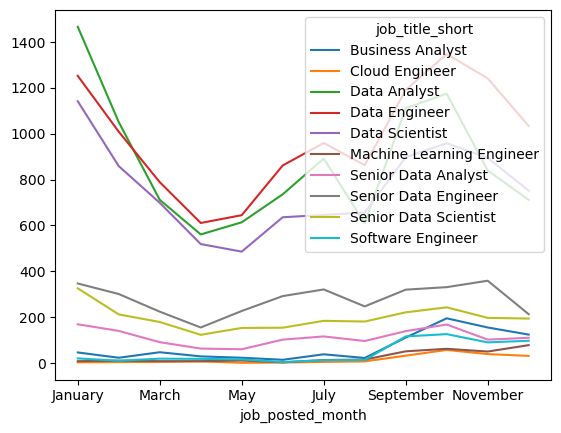

In [26]:
df_uk_pivot.plot(kind='line')

In [22]:
top_3 = df_uk['job_title_short'].value_counts().head(3)

In [23]:
top_3

job_title_short
Data Engineer     11807
Data Analyst      10482
Data Scientist     9148
Name: count, dtype: int64

In [24]:
top_3.index.tolist()

['Data Engineer', 'Data Analyst', 'Data Scientist']

In [25]:
top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

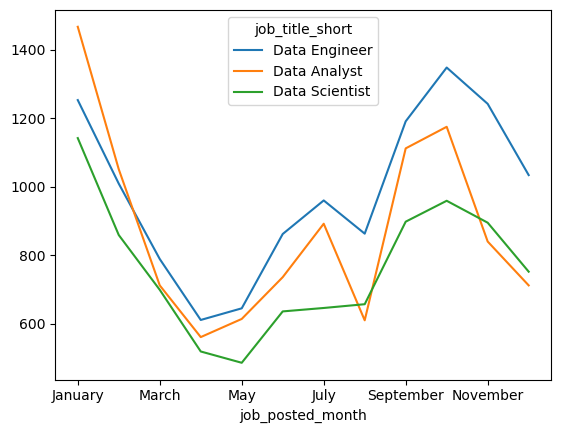

In [27]:
df_uk_pivot[top_3].plot(kind='line')

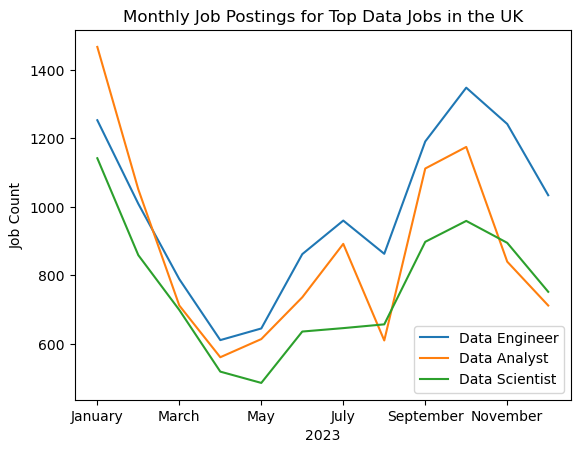

In [29]:
df_uk_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the UK')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend();